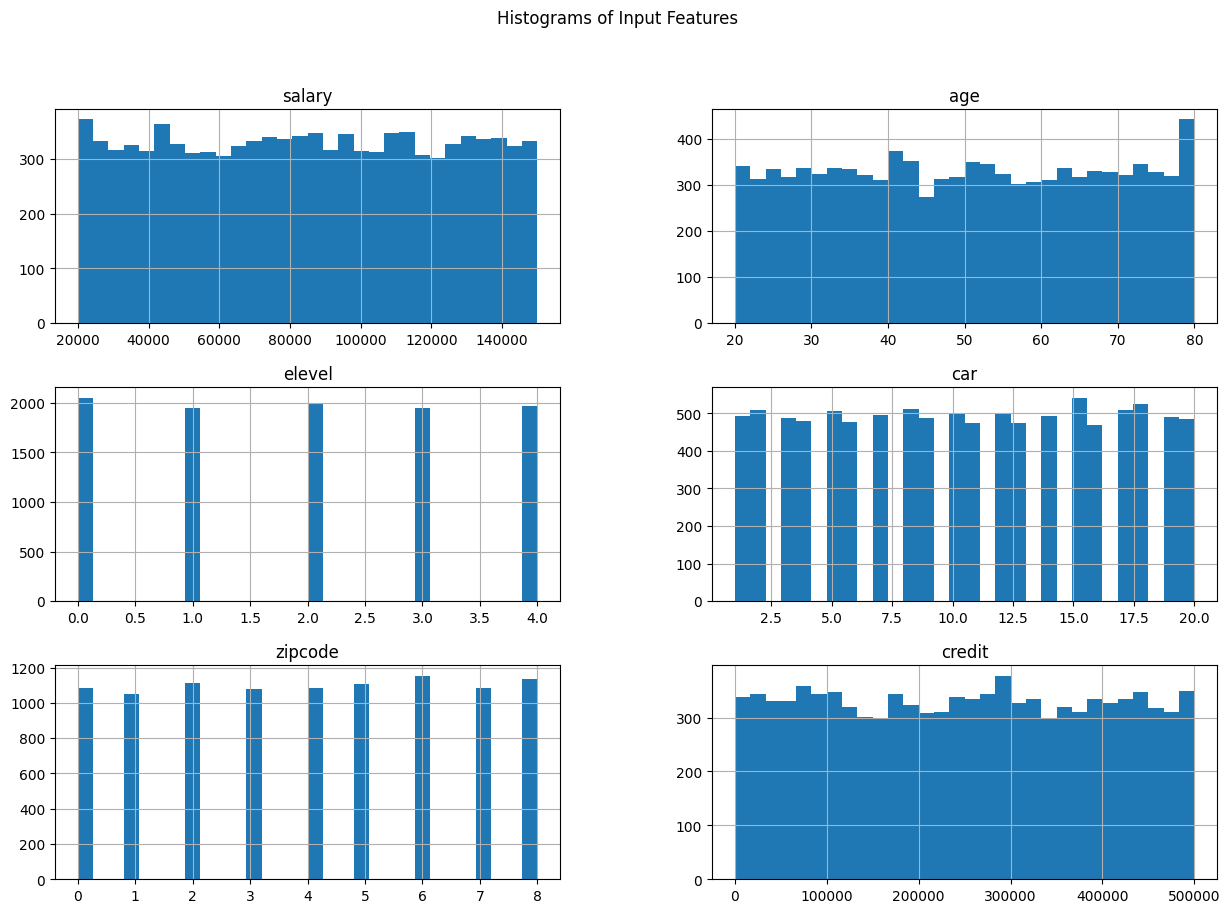

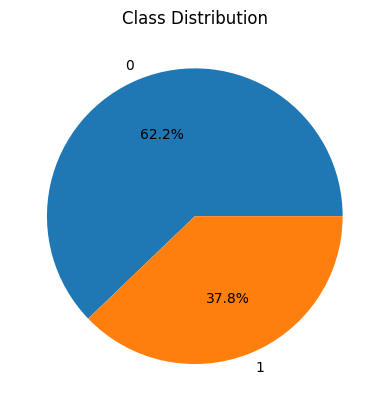

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint


# Load dataset
data = pd.read_csv("CompleteResponses.csv")

# Distribution of each column
input_features = data.columns[:-1]
data[input_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Input Features")
plt.show()

class_counts = data['brand'].value_counts()
plt.pie(class_counts, labels=['0', '1'], autopct='%1.1f%%')
plt.title("Class Distribution")
plt.show()

# Normalization of data
normalized_data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
#

In [9]:

# Split the data into features (X) and target (y)
X = normalized_data.drop("brand", axis=1)
y = normalized_data["brand"]

# Train the data using Keras
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

history = model.fit(X, y, epochs=50, validation_split=0.2, callbacks=[checkpoint])

# Print the accuracy
best_model = tf.keras.models.load_model("best_model.h5")
_, train_accuracy = best_model.evaluate(X, y, verbose=1)
print(f"Train accuracy: {train_accuracy:.4f}")


Epoch 1/50
226/248 [==========================>...] - ETA: 0s - loss: 0.6481 - accuracy: 0.6179
Epoch 1: val_accuracy improved from -inf to 0.64949, saving model to best_model.h5
248/248 [==============================] - 2s 4ms/step - loss: 0.6471 - accuracy: 0.6180 - val_loss: 0.6212 - val_accuracy: 0.6495
Epoch 2/50
244/248 [============================>.] - ETA: 0s - loss: 0.5844 - accuracy: 0.6773
Epoch 2: val_accuracy improved from 0.64949 to 0.72273, saving model to best_model.h5
248/248 [==============================] - 1s 3ms/step - loss: 0.5833 - accuracy: 0.6778 - val_loss: 0.5285 - val_accuracy: 0.7227
Epoch 3/50
242/248 [============================>.] - ETA: 0s - loss: 0.4992 - accuracy: 0.7528
Epoch 3: val_accuracy improved from 0.72273 to 0.76162, saving model to best_model.h5
248/248 [==============================] - 1s 3ms/step - loss: 0.4985 - accuracy: 0.7533 - val_loss: 0.4688 - val_accuracy: 0.7616
Epoch 4/50
234/248 [===========================>..] - ETA: 0s - 

In [10]:

# Shuffle data
shuffled_data = normalized_data.sample(frac=1).reset_index(drop=True)

# Split data, test and validation
train_size = int(0.8 * len(shuffled_data))
X_train, X_val = shuffled_data.iloc[:train_size, :-1], shuffled_data.iloc[train_size:, :-1]
y_train, y_val = shuffled_data.iloc[:train_size, -1], shuffled_data.iloc[train_size:, -1]

# Train a deep model with a larger number of neurons for validation dataset
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_val = ModelCheckpoint("best_model_val.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
checkpoint_train = ModelCheckpoint("best_model_train.h5", monitor='accuracy', verbose=1, save_best_only=True, mode='max')
history_val = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[checkpoint_val, checkpoint_train])

# Print accuracy on both training and validation dataset
best_model_val = tf.keras.models.load_model("best_model_val.h5")
best_model_train = tf.keras.models.load_model("best_model_train.h5")
_, train_accuracy = best_model_train.evaluate(X_train, y_train, verbose=1)
_, val_accuracy = best_model_val.evaluate(X_val, y_val, verbose=1)
print(f"Train accuracy: {train_accuracy:.4f}, Validation accuracy: {val_accuracy:.4f}")


Epoch 1/50
246/248 [============================>.] - ETA: 0s - loss: 0.5092 - accuracy: 0.7270
Epoch 1: val_accuracy improved from -inf to 0.79899, saving model to best_model_val.h5

Epoch 1: accuracy improved from -inf to 0.72758, saving model to best_model_train.h5
248/248 [==============================] - 3s 7ms/step - loss: 0.5082 - accuracy: 0.7276 - val_loss: 0.4279 - val_accuracy: 0.7990
Epoch 2/50
244/248 [============================>.] - ETA: 0s - loss: 0.3236 - accuracy: 0.8511
Epoch 2: val_accuracy improved from 0.79899 to 0.87020, saving model to best_model_val.h5

Epoch 2: accuracy improved from 0.72758 to 0.85072, saving model to best_model_train.h5
248/248 [==============================] - 2s 7ms/step - loss: 0.3241 - accuracy: 0.8507 - val_loss: 0.3065 - val_accuracy: 0.8702
Epoch 3/50
247/248 [============================>.] - ETA: 0s - loss: 0.2788 - accuracy: 0.8784
Epoch 3: val_accuracy improved from 0.87020 to 0.88737, saving model to best_model_val.h5

Epoch 3

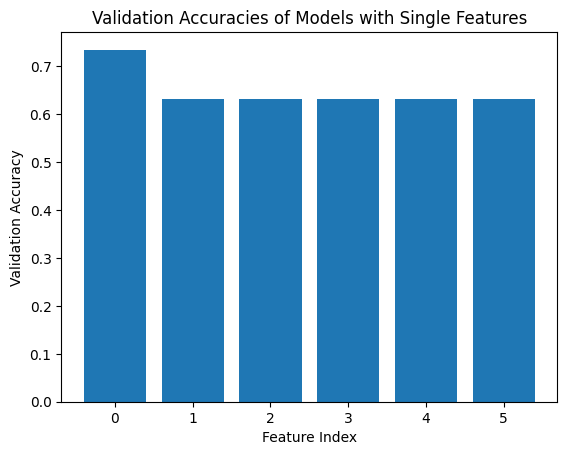

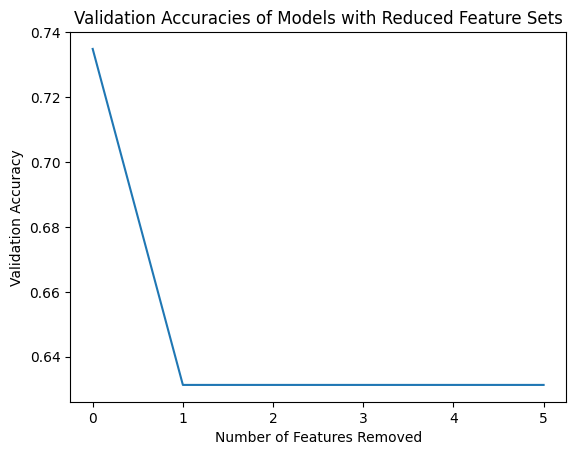

In [12]:


# Split the data into features (X) and target (y)
X = normalized_data.drop(columns=["brand"])
y = normalized_data["brand"]

# Get number of features
n_features = X.shape[1]

# Train models with single features
single_feature_accuracies = []
for i in range(n_features):
    # Select single feature
    X_single = X.iloc[:, i:i+1]
    # Split data into training and validation sets
    train_size = int(0.8 * len(X_single))
    X_train, X_val = X_single.iloc[:train_size], X_single.iloc[train_size:]
    y_train, y_val = y.iloc[:train_size], y.iloc[train_size:]
    # Build and train model
    model = Sequential([
        Dense(32, activation="relu", input_shape=[1]),
        Dense(64, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    # Define checkpoint to save best model
    checkpoint = ModelCheckpoint("best_single_feature_model.h5", save_best_only=True, save_weights_only=True)
    # Train model with checkpointing
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[checkpoint], verbose=1)
    # Load best model and compute validation accuracy
    model.load_weights("best_single_feature_model.h5")
    _, accuracy = model.evaluate(X_val, y_val, verbose=1)
    single_feature_accuracies.append(accuracy)

# Plot single-feature accuracies
plt.bar(range(n_features), single_feature_accuracies)
plt.xlabel("Feature Index")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracies of Models with Single Features")
plt.show()

# Train models with reduced feature sets
reduced_feature_accuracies = [max(single_feature_accuracies)]
for i in range(1, n_features):
    # Select features to keep
    features_to_keep = np.argsort(single_feature_accuracies)[:n_features-i]
    X_reduced = X.iloc[:, features_to_keep]
    # Split data into training and validation sets
    train_size = int(0.8 * len(X_reduced))
    X_train, X_val = X_reduced.iloc[:train_size], X_reduced.iloc[train_size:]
    y_train, y_val = y.iloc[:train_size], y.iloc[train_size:]
    # Build and train model
    model = Sequential([
        Dense(32, activation="relu", input_shape=[X_reduced.shape[1]]),
        Dense(64, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    # Define checkpoint to save best model
    checkpoint = ModelCheckpoint("best_reduced_feature_model.h5", save_best_only=True, save_weights_only=True)
    # Train model with checkpointing
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[checkpoint], verbose=1)
    # Load best model and compute validation accuracy
    model.load_weights("best_reduced_feature_model.h5")
    _, accuracy = model.evaluate(X_val, y_val, verbose=1)
    reduced_feature_accuracies.append(accuracy)
# Plot accuracies of models with reduced feature sets
plt.plot(range(len(reduced_feature_accuracies)), reduced_feature_accuracies)
plt.xlabel("Number of Features Removed")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracies of Models with Reduced Feature Sets")
plt.show()
